# Рассеяние на верхней и нижней границах одновременно

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cmath
import math
from scipy.integrate import quad
from Whisker_plot import whisker_plot

Варьировать по: 1) Углу ввод альфа, глубине трещины, шагу при повороте (с учетом 3-го критического) на ребре и на поверхности, по высоте трещины (верхнее и нижнее ребро)

In [112]:
theta_0 = np.linspace((np.pi /180) * 5, (np.pi /180) * 85,100)
x_0 = 0.01
alpha_0 = np.pi /180 * float(input("Введите угол альфа в градусах: "))
alpha_0f = alpha_0

Введите угол альфа в градусах:  60


In [113]:
a_0f = - np.cos(alpha_0f) #Правильно
tau =  2.0 # = ks / kl
nu = (1.0 / 0.93) * 2.0 #= kr / kl

In [114]:
b_0f = np.linspace(0j, 1j, theta_0.shape[0])
c_0 = np.linspace(0j, 1j, theta_0.shape[0])
c_0f = np.linspace(0j, 1j, theta_0.shape[0])
theta_rec = np.linspace(0j, 1j, theta_0.shape[0])
r_L = np.zeros(theta_0.shape[0])
z_L = np.zeros(theta_0.shape[0])
p1 = np.linspace(0j, 1j, theta_0.shape[0])
zeta1 = np.linspace(0j, 1j, theta_0.shape[0])
gamma_Lplus1 = np.linspace(0j, 1j, theta_0.shape[0])
gamma_Lminus1 = np.linspace(0j, 1j, theta_0.shape[0])
gamma_Sminus1 = np.linspace(0j, 1j, theta_0.shape[0])
gamma_Splus1 = np.linspace(0j, 1j, theta_0.shape[0])
gamma_L1 = np.linspace(0j, 1j, theta_0.shape[0])
gamma_S1 = np.linspace(0j, 1j, theta_0.shape[0])
rho = np.linspace(0.0 + 0j, 1 + 0j, theta_0.shape[0])
rho1 = np.linspace(0j, 1j, theta_0.shape[0])
Int_M_Minus = np.linspace(0j, 1j, theta_0.shape[0])
Int_M_Plus = np.linspace(0j, 1j, theta_0.shape[0])
M_Minus = np.linspace(0j, 1j, theta_0.shape[0])
M_Plus = np.linspace(0j, 1j, theta_0.shape[0])
f1_1_lower = np.linspace(0j, 1j, theta_0.shape[0])
f1_1_upper = np.linspace(0j, 1j, theta_0.shape[0])
#f1_den = np.linspace(0j, 1j, theta_0.shape[0])
f1_2_lower = np.linspace(0j, 1j, theta_0.shape[0])
f1_2_upper = np.linspace(0j, 1j, theta_0.shape[0])
R_plus1 = np.linspace(0j, 1j, theta_0.shape[0])
R_minus1 = np.linspace(0j, 1j, theta_0.shape[0])
# R_plus = np.linspace(0j, 1j, theta_0.shape[0])
# R_minus = np.linspace(0j, 1j, theta_0.shape[0])
# R1 = np.linspace(0j, 1j, theta_0.shape[0])
Q1_L1_lower = np.linspace(0j, 1j, theta_0.shape[0])
Q1_L3_lower = np.linspace(0j, 1j, theta_0.shape[0])
Q1_L1_upper = np.linspace(0j, 1j, theta_0.shape[0])
Q1_L3_upper = np.linspace(0j, 1j, theta_0.shape[0])
f_d1_lower = np.linspace(0j, 1j, theta_0.shape[0])
f_d1_upper = np.linspace(0j, 1j, theta_0.shape[0])
f_dabs1_lower = np.zeros(theta_0.shape[0])
f_dabs1_upper = np.zeros(theta_0.shape[0])
f_log1_lower = np.zeros(theta_0.shape[0])
f_log1_upper = np.zeros(theta_0.shape[0])
phi_L = np.zeros(theta_0.shape[0])

In [5]:
def Integral_old(tau, rho1):
    omega_array = np.arange(1 , tau , 0.005)
    Sum = 0
    d_omega = omega_array[1] - omega_array[0]
    for omega in omega_array:
        d_sum = d_omega * (math.atan((4 * omega**2 * np.sqrt((tau**2 - omega**2) * (omega**2 - 1))) / ((0.5 * tau**2 - omega**2)**2)) / (omega - rho1)) 
        Sum = Sum + d_sum 
    return Sum

In [6]:
def integrand(omega, tau, rho1, plus):
    if plus:
        return np.atan((4 * omega**2 * np.sqrt((tau**2 - omega**2) * (omega**2 - 1))) / ((0.5 * tau**2 - omega**2)**2)) / (omega + rho1)
    else:
        return np.atan((4 * omega**2 * np.sqrt((tau**2 - omega**2) * (omega**2 - 1))) / ((0.5 * tau**2 - omega**2)**2)) / (omega - rho1)
                                                                                                                          
#Если переменная plus = True то интеграл с плюсом, если False то минус     
                                                                                                                           
def Integral(tau, rho1, plus):
    res, err = quad(integrand, 1.0, tau, args = (tau, rho1, plus))
    return res

In [7]:
def IntegralPlus_old(tau, rho1):
    omega_array = np.arange(1 , tau , 0.005)
    Sum = 0
    d_omega = omega_array[1] - omega_array[0]
    for omega in omega_array:
        d_sum = d_omega * (math.atan((4 * omega**2 * np.sqrt((tau**2 - omega**2) * (omega**2 - 1)))/((0.5 * tau**2 - omega**2)**2)) / (omega + rho1)) 
        Sum = Sum + d_sum 
    return Sum

## y <= 0

In [115]:
for i in range(0,theta_0.shape[0]):
    
    b_0f[i] = - np.sin(alpha_0f) * np.sin(theta_0[i]) 
    
    c_0f[i] = - np.sin(alpha_0f) * np.cos(theta_0[i]) 

    theta_rec[i] = theta_0[i] + np.pi * 0.5

    z_L[i] = - x_0 * np.tan(alpha_0f) * np.sin(theta_rec[i])

    r_L[i] = x_0 * np.sqrt(1.0 + (np.tan(alpha_0f) * np.cos(theta_rec[i]))**2)

    phi_L[i] = np.atan(np.tan(alpha_0f) * np.cos(theta_rec[i]))
    
    p1[i] = np.sqrt(1 - c_0f[i]**2) 
    
    zeta1[i] = p1[i] * np.cos(phi_L[i]) 
    
    gamma_Lplus1[i] = np.sqrt(np.sqrt(zeta1[i]**2 + c_0f[i]**2) - 1) 

    gamma_Lminus1[i] = np.sqrt(np.sqrt(zeta1[i]**2 + c_0f[i]**2) + 1)

    gamma_Splus1[i] = np.sqrt(np.sqrt(zeta1[i]**2 + c_0f[i]**2) - tau)
    
    gamma_Sminus1[i] = np.sqrt(np.sqrt(zeta1[i]**2 + c_0f[i]**2) + tau)
    
    rho1[i] = np.sqrt(zeta1[i]**2 + c_0f[i]**2)
    
    gamma_S1[i] = np.sqrt(zeta1[i]**2 - tau**2  + c_0f[i]**2) #OK
    
    gamma_L1[i] = np.sqrt(zeta1[i]**2 - 1 + c_0f[i]**2) #OK 
    
    #R1[i] = (0.5 * tau**2 - (zeta1[i]**2 + c_0f[i]**2))**2 - (zeta1[i]**2 - (1 - c_0f[i]**2)) * gamma_L1[i] * gamma_S1[i]

    Int_M_Minus[i] = Integral(tau, rho1[i].real, plus = False)

    Int_M_Plus[i] = Integral(tau, rho1[i].real, plus = True)

    M_Minus[i] = np.exp(- Int_M_Minus[i] / np.pi)

    M_Plus[i] = np.exp(- Int_M_Plus[i] / np.pi)

    R_minus1[i] = np.sqrt(2) * np.sqrt(tau**2 - 1) * (nu + rho1[i]) * M_Minus[i]

    R_plus1[i] = np.sqrt(2) * np.sqrt(tau**2 - 1) * (nu - rho1[i]) * M_Plus[i]

    f1_1_lower[i] = (0.5 * tau**2 - zeta1[i]**2 - c_0f[i]**2) / (R_plus1[i] * gamma_Lminus1[i] * (-zeta1[i] + a_0f))

    f1_1_upper[i] = (0.5 * tau**2 - zeta1[i]**2 - c_0f[i]**2) / (R_minus1[i] * gamma_Lplus1[i] * (-zeta1[i] + a_0f))

    f1_2_lower[i] = (gamma_Splus1[i]) / (R_plus1[i] * (- zeta1[i] + a_0f))

    f1_2_upper[i] = (gamma_Sminus1[i]) / (R_minus1[i] * (- zeta1[i] + a_0f))
    
    Q1_L1_lower[i] = 1j * (0.5 * tau**2 - (1 - b_0f[i]**2)) / np.sqrt(2 * np.pi)

    Q1_L1_upper[i] = - 1j * (0.5 * tau**2 - (1 - b_0f[i]**2)) / np.sqrt(2 * np.pi)
    
    Q1_L3_lower[i] = 1j * b_0f[i] * (a_0f**2 + c_0f[i]**2)  / np.sqrt(2 * np.pi)
    
    Q1_L3_upper[i] = - 1j * b_0f[i] * (a_0f**2 + c_0f[i]**2)  / np.sqrt(2 * np.pi)
    
    f_d1_lower[i] = (np.sqrt(p1[i]) / (np.sqrt(tau**2 - 1) * np.sqrt(tau - a_0f)) ) * (- Q1_L1_lower[i] * f1_1_lower[i] + 1j * Q1_L3_lower[i] * f1_2_lower[i]) * np.sin(phi_L[i]) * (1 / np.sqrt(r_L[i])) #* np.exp(1j * (k_l * p1[i] * r_L[i] + k_l * c_0f[i] * z_L[i]) - 1j * np.pi / 4))
    
    f_d1_upper[i] = (np.sqrt(p1[i]) / (np.sqrt(tau**2 - 1) * np.sqrt(tau + a_0f)) ) * (- Q1_L1_upper[i] * f1_1_upper[i] + 1j * Q1_L3_upper[i] * f1_2_upper[i]) * np.sin(phi_L[i]) * (1 / np.sqrt(r_L[i])) #* np.exp(1j * (k_l * p1[i] * r_L[i] + k_l * c_0f[i] * z_L[i]) - 1j * np.pi / 4))
                                                                                                                                 
    f_dabs1_lower[i] = np.abs(f_d1_lower[i])      

    f_dabs1_upper[i] = np.abs(f_d1_upper[i])      

    # f_dabs1_lower[i] = np.abs(np.sqrt(p1[i]) / (np.sqrt(tau**2 - 1) * np.sqrt(tau - a_0f)) ) * np.abs(- Q1_L1_lower[i] * f1_1_lower[i] + 1j * Q1_L3_lower[i] * f1_2_lower[i]) * np.sin(phi_L[i]) * (1 / np.sqrt(r_L[i]))

    # f_dabs1_upper[i] = np.abs(np.sqrt(p1[i]) / (np.sqrt(tau**2 - 1) * np.sqrt(tau + a_0f)) ) * np.abs(- Q1_L1_upper[i] * f1_1_upper[i] + 1j * Q1_L3_upper[i] * f1_2_upper[i]) * np.sin(phi_L[i]) * (1 / np.sqrt(r_L[i]))

C:\Users\User\AppData\Local\Temp\ipykernel_2968\3116333386.py:9: ComplexWarning: Casting complex values to real discards the imaginary part
  z_L[i] = - x_0 * np.tan(alpha_0f) * np.sin(theta_rec[i])
C:\Users\User\AppData\Local\Temp\ipykernel_2968\3116333386.py:11: ComplexWarning: Casting complex values to real discards the imaginary part
  r_L[i] = x_0 * np.sqrt(1.0 + (np.tan(alpha_0f) * np.cos(theta_rec[i]))**2)
C:\Users\User\AppData\Local\Temp\ipykernel_2968\3116333386.py:13: ComplexWarning: Casting complex values to real discards the imaginary part
  phi_L[i] = np.atan(np.tan(alpha_0f) * np.cos(theta_rec[i]))


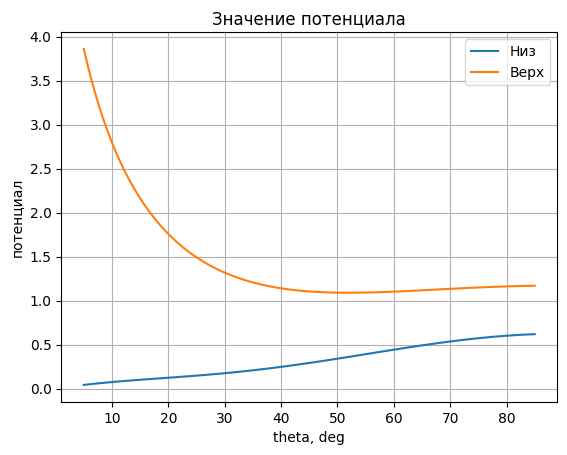

In [116]:
plt.grid()
plt.plot(theta_0 * 180 / np.pi, f_dabs1_lower, label = "Низ")
plt.plot(theta_0 * 180 / np.pi, f_dabs1_upper, label = "Верх")
#plt.plot(theta_0 * 180 / np.pi, f_dabs1_upper + f_dabs1_lower, label = "Сумма")
plt.title('Значение потенциала')
plt.ylabel('потенциал')
plt.xlabel('theta, deg')
plt.legend()

In [110]:
mx_lower = f_dabs1_lower[~np.isnan(f_dabs1_lower)].max()
mx_upper = f_dabs1_upper[~np.isnan(f_dabs1_upper)].max()
for j in range(0,theta_0.shape[0]):
    f_log1_lower[j] = 20 * np.log10(f_dabs1_lower[j] / mx_lower)
    f_log1_upper[j] = 20 * np.log10(f_dabs1_upper[j] / mx_upper)

In [106]:
amp_exp = [35.0, 35.07420363,	34.82368375, 34.42777543, 34.10981822, 33.96666407, 33.41057105, 32.48263609, 31.988797, 31.85101757, 31.64883536, 31.5830519, 31.42129971, 30.74169526, 30.2918789, 30.26325443, 30.17102031, 29.7191309, 29.56317883]
ang_exp = [0, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90]
CIs = [0.168471297,	0.101836559, 0.195725349, 0.369882563, 0.437561254, 0.371976226, 0.395229008, 0.577867542, 0.679742726, 0.566289132, 0.477751997, 0.460210742, 0.412434641, 0.438626757, 0.667789632, 0.864048922, 0.768846937, 0.480906636, 0.269165204]
amp_exp1 = amp_exp[::-1]

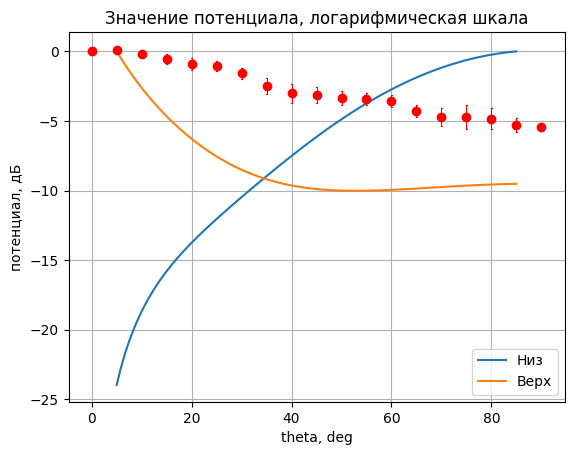

In [111]:
plt.grid()
plt.plot(theta_0 * 180 / np.pi, f_log1_lower, label = "Низ")
plt.plot(theta_0 * 180 / np.pi, f_log1_upper, label = "Верх")
plt.title('Значение потенциала, логарифмическая шкала')
for i in range(len(amp_exp)):
    whisker_plot(ang_exp[i], amp_exp[i] - 35.0, CIs[i], color_dot='red', marker_dot= 'o', color_whisker= 'red')
plt.ylabel('потенциал, дБ')
plt.xlabel('theta, deg')
plt.legend()

## y >= 0

In [58]:
for i in range(0,theta_0.shape[0]):
    
    b_0f[i] = - np.sin(alpha_0f) * np.sin(theta_0[i]) 
    
    c_0f[i] = - np.sin(alpha_0f) * np.cos(theta_0[i]) 

    theta_rec[i] = np.pi * 0.5 - theta_0[i]

    z_L[i] = - x_0 * np.tan(alpha_0f) * np.sin(theta_rec[i])

    r_L[i] = x_0 * np.sqrt(1.0 + (np.tan(alpha_0f) * np.cos(theta_rec[i]))**2)

    phi_L[i] = np.atan(np.tan(alpha_0f) * np.cos(theta_rec[i]))
    
    p1[i] = np.sqrt(1 - c_0f[i]**2) 
    
    zeta1[i] = - p1[i] * np.cos(phi_L[i]) 
    
    gamma_Lplus1[i] = np.sqrt(np.sqrt(zeta1[i]**2 + c_0f[i]**2) - 1) 

    gamma_Lminus1[i] = np.sqrt(np.sqrt(zeta1[i]**2 + c_0f[i]**2) + 1)

    gamma_Splus1[i] = np.sqrt(np.sqrt(zeta1[i]**2 + c_0f[i]**2) - tau)
    
    gamma_Sminus1[i] = np.sqrt(np.sqrt(zeta1[i]**2 + c_0f[i]**2) + tau)
    
    rho1[i] = np.sqrt(zeta1[i]**2 + c_0f[i]**2)
    
    gamma_S1[i] = np.sqrt(zeta1[i]**2 - tau**2  + c_0f[i]**2) #OK
    
    gamma_L1[i] = np.sqrt(zeta1[i]**2 - 1 + c_0f[i]**2) #OK 
    
    #R1[i] = (0.5 * tau**2 - (zeta1[i]**2 + c_0f[i]**2))**2 - (zeta1[i]**2 - (1 - c_0f[i]**2)) * gamma_L1[i] * gamma_S1[i]

    Int_M_Minus[i] = Integral(tau, rho1[i].real, plus = False)

    Int_M_Plus[i] = Integral(tau, rho1[i].real, plus = True)

    M_Minus[i] = np.exp(- Int_M_Minus[i] / np.pi)

    M_Plus[i] = np.exp(- Int_M_Plus[i] / np.pi)

    R_minus1[i] = np.sqrt(2) * np.sqrt(tau**2 - 1) * (nu + rho1[i]) * M_Minus[i]

    R_plus1[i] = np.sqrt(2) * np.sqrt(tau**2 - 1) * (nu - rho1[i]) * M_Plus[i]

    f1_1_lower[i] = (0.5 * tau**2 - zeta1[i]**2 - c_0f[i]**2) / (R_plus1[i] * gamma_Lminus1[i] * (zeta1[i] + a_0f))

    f1_1_upper[i] = (0.5 * tau**2 - zeta1[i]**2 - c_0f[i]**2) / (R_minus1[i] * gamma_Lplus1[i] * (zeta1[i] + a_0f))

    f1_2_lower[i] = (gamma_Splus1[i]) / (R_plus1[i] * (zeta1[i] + a_0f))

    f1_2_upper[i] = (gamma_Sminus1[i]) / (R_minus1[i] * (zeta1[i] + a_0f))
    
    Q1_L1_lower[i] = 1j * (0.5 * tau**2 - (1 - b_0f[i]**2)) / np.sqrt(2 * np.pi)

    Q1_L1_upper[i] = - 1j * (0.5 * tau**2 - (1 - b_0f[i]**2)) / np.sqrt(2 * np.pi)
    
    Q1_L3_lower[i] = 1j * b_0f[i] * (a_0f**2 + c_0f[i]**2)  / np.sqrt(2 * np.pi)
    
    Q1_L3_upper[i] = - 1j * b_0f[i] * (a_0f**2 + c_0f[i]**2)  / np.sqrt(2 * np.pi)
    
    f_d1_lower[i] = (np.sqrt(p1[i]) / (np.sqrt(tau**2 - 1) * np.sqrt(tau - a_0f)) ) * (- Q1_L1_lower[i] * f1_1_lower[i] - 1j * Q1_L3_lower[i] * f1_2_lower[i]) * np.sin(phi_L[i]) * (1 / np.sqrt(r_L[i])) #* np.exp(1j * (k_l * p1[i] * r_L[i] + k_l * c_0f[i] * z_L[i]) - 1j * np.pi / 4))
    
    f_d1_upper[i] = (np.sqrt(p1[i]) / (np.sqrt(tau**2 - 1) * np.sqrt(tau + a_0f)) ) * (- Q1_L1_upper[i] * f1_1_upper[i] - 1j * Q1_L3_upper[i] * f1_2_upper[i]) * np.sin(phi_L[i]) * (1 / np.sqrt(r_L[i])) #* np.exp(1j * (k_l * p1[i] * r_L[i] + k_l * c_0f[i] * z_L[i]) - 1j * np.pi / 4))
                                                                                                                                 
    f_dabs1_lower[i] = np.abs(f_d1_lower[i])      

    f_dabs1_upper[i] = np.abs(f_d1_upper[i])      

C:\Users\User\AppData\Local\Temp\ipykernel_2968\3921384930.py:9: ComplexWarning: Casting complex values to real discards the imaginary part
  z_L[i] = - x_0 * np.tan(alpha_0f) * np.sin(theta_rec[i])
C:\Users\User\AppData\Local\Temp\ipykernel_2968\3921384930.py:11: ComplexWarning: Casting complex values to real discards the imaginary part
  r_L[i] = x_0 * np.sqrt(1.0 + (np.tan(alpha_0f) * np.cos(theta_rec[i]))**2)
C:\Users\User\AppData\Local\Temp\ipykernel_2968\3921384930.py:13: ComplexWarning: Casting complex values to real discards the imaginary part
  phi_L[i] = np.atan(np.tan(alpha_0f) * np.cos(theta_rec[i]))


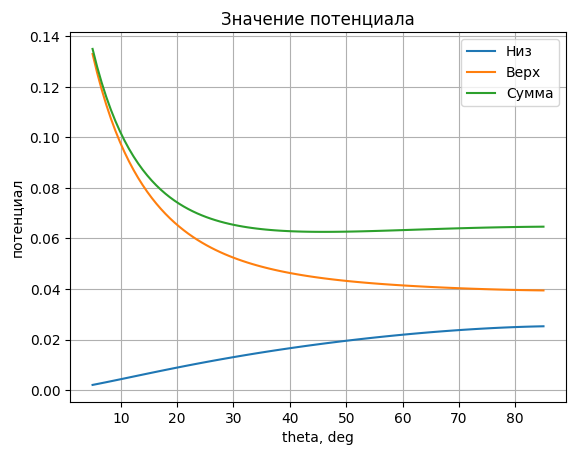

In [59]:
plt.grid()
plt.plot(theta_0 * 180 / np.pi, f_dabs1_lower, label = "Низ")
plt.plot(theta_0 * 180 / np.pi, f_dabs1_upper, label = "Верх")
plt.plot(theta_0 * 180 / np.pi, f_dabs1_upper + f_dabs1_lower, label = "Сумма")
plt.title('Значение потенциала')
plt.ylabel('потенциал')
plt.xlabel('theta, deg')
plt.legend()

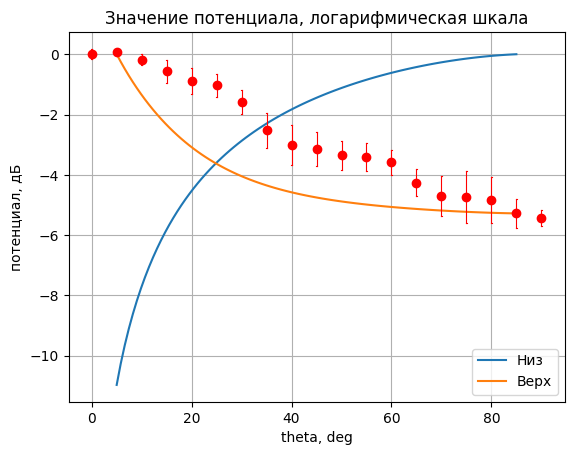

In [63]:
plt.grid()
plt.plot(theta_0 * 180 / np.pi, f_log1_lower, label = "Низ")
plt.plot(theta_0 * 180 / np.pi, f_log1_upper, label = "Верх")
plt.title('Значение потенциала, логарифмическая шкала')
# for i in range(len(amp_exp)):
#     whisker_plot(ang_exp[i], amp_exp[i] - 35.0, CIs[i], color_dot='red', marker_dot= 'o', color_whisker= 'red')
plt.ylabel('потенциал, дБ')
plt.xlabel('theta, deg')
plt.legend()

In [61]:
mx_lower = f_dabs1_lower[~np.isnan(f_dabs1_lower)].max()
mx_upper = f_dabs1_upper[~np.isnan(f_dabs1_upper)].max()
for j in range(0,theta_0.shape[0]):
    f_log1_lower[j] = 10 * np.log10(f_dabs1_lower[j] / mx_lower)
    f_log1_upper[j] = 10 * np.log10(f_dabs1_upper[j] / mx_upper)